Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler# to standardize
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Data collection

In [ ]:
#loading the data
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")

Data analysis

In [ ]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
df.shape

(1338, 7)

In [ ]:
#information about columns, number of columns how many non null values they contain and datatype of values, number of rows as entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical features: sex,smoker,region
and Numerical features: rest

In [ ]:
#statistical measures for all columns in dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data visualization

<ipython-input-566-aa286fa49aa9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])#distplot for numerical values


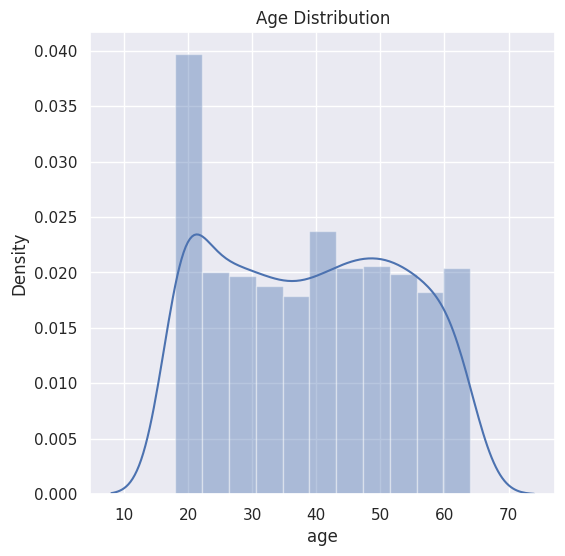

In [ ]:
#Distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])#distplot for numerical values
plt.title('Age Distribution')
plt.show()

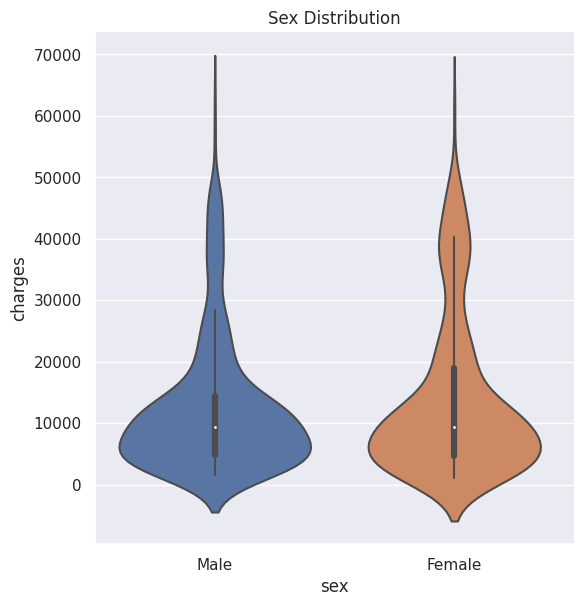

In [ ]:
#Distribution of gender
sns.catplot(x='sex',y='charges',data=df,height=6,kind='violin')
plt.xticks([0,1],['Male','Female'])
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-569-6e49fb348def>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])#distplot for numerical values


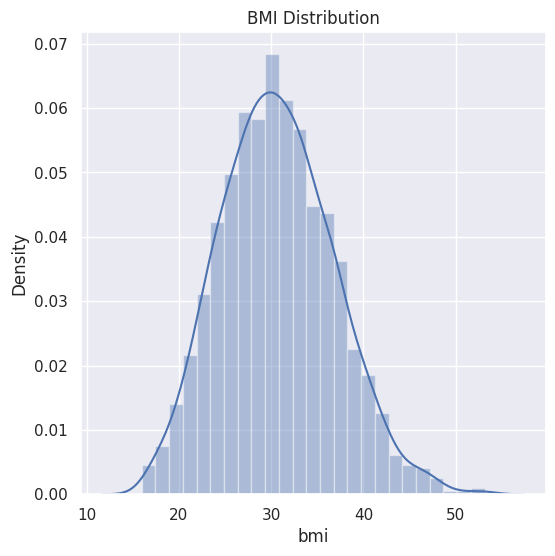

In [ ]:
#Distribution of BMI
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])#distplot for numerical values
plt.title('BMI Distribution')
plt.show()

Normal BMI: 18.5 to 24.9  
Normal distribution: more values in midrange

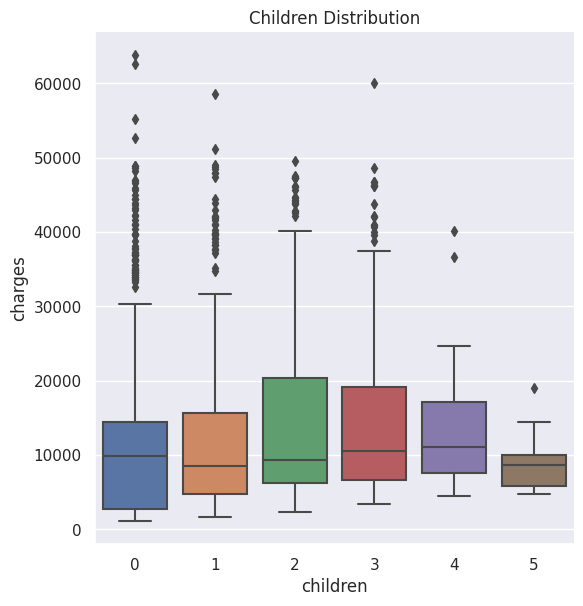

In [ ]:
#Distribution of Children
sns.catplot(x='children',y='charges',data=df,height=6,kind='box')
plt.title('Children Distribution')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

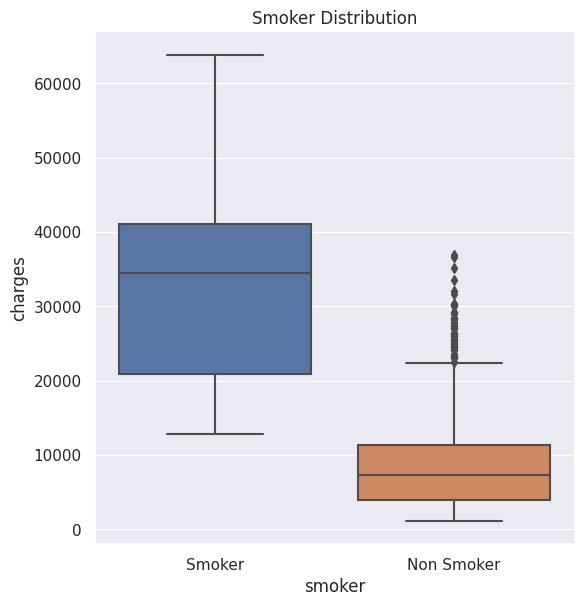

In [ ]:
#Distribution of smoker
sns.catplot(x='smoker',y='charges',data=df,height=6,kind='box')
plt.xticks([0,1],['Smoker','Non Smoker'])
plt.title('Smoker Distribution')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

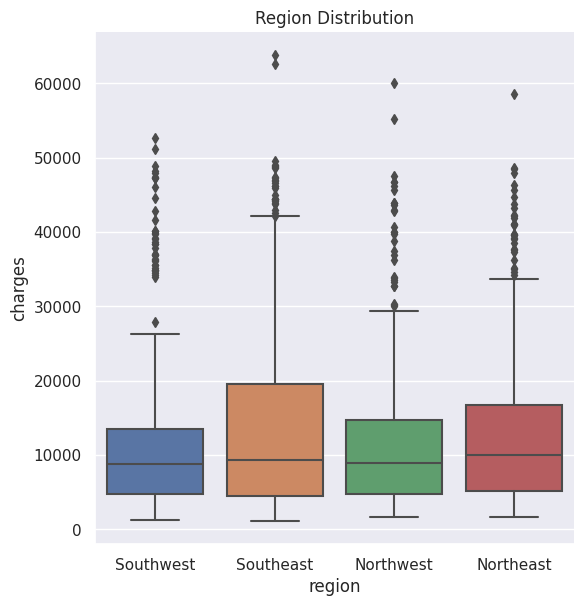

In [ ]:
#Distribution of region
sns.catplot(x='region',y='charges',data=df,height=6,kind='box')
plt.xticks([0,1,2,3],['Southwest','Southeast','Northwest','Northeast'])
plt.title('Region Distribution')
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-576-6e227933e7e1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])#distplot for numerical values


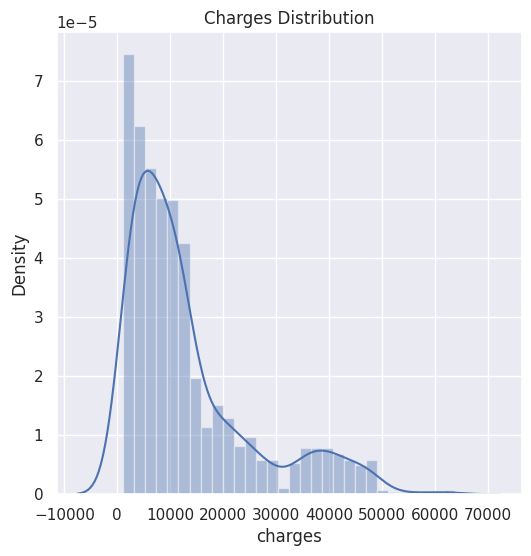

In [ ]:
#Distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])#distplot for numerical values
plt.title('Charges Distribution')
plt.show()

Data preprocessing

Label encoding

In [ ]:
label_encode=LabelEncoder()

In [ ]:
labels=label_encode.fit_transform(df.sex)#takes labels from sex col male and female and transforms to 0 and 1

In [ ]:
df['sex']=labels#making a new col in df with values from labels which are labelly encoded
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


0: female     and     1:male

In [ ]:
labels=label_encode.fit_transform(df.smoker)#takes labels from smoker col yes and no and transforms to 0 and 1

In [ ]:
df['smoker']=labels#making a new col in df with values from labels which are labelly encoded
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


0: no   and 1:yes

In [ ]:
labels=label_encode.fit_transform(df.region)#takes labels from region col and transforms to 0,1,2,3

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,northwest,10600.5483
1334,18,0,31.92,0,0,northeast,2205.9808
1335,18,0,36.85,0,0,southeast,1629.8335
1336,21,0,25.80,0,0,southwest,2007.9450
1337,61,0,29.07,0,1,northwest,29141.3603


In [ ]:
df['region']=labels#making a new col in df with values from labels which are labelly encoded

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


0:northeast
and 1: northwest
and 2:southeast
and 3:southwest

Splitting features and target

In [ ]:
#features
X = df.drop(columns='charges', axis=1)

#target
Y = df['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [ ]:
X.shape

(1338, 6)

In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
Y.shape

(1338,)

Data standardization

In [ ]:
print(X.std())

age         14.049960
sex          0.500160
bmi          6.098187
children     1.205493
smoker       0.403694
region       1.104885
dtype: float64


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
X=scaler.transform(X)

In [ ]:
print(X.std())

1.0


Splitting data into train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Linear Regression

Model training

In [ ]:
# loading the Linear Regression model
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

Predicting value

In [ ]:
# prediction on training data
Y_train_pred =model.predict(X_train)


Model testing

In [ ]:
# prediction on test data
Y_test_pred =model.predict(X_test)

In [ ]:
# R squared value
r2_lin = metrics.r2_score(Y_test,Y_test_pred)
print('R squared vale : ', r2_lin)

R squared vale :  0.7445422986536503


In [ ]:
# X = df[['age']]  # Feature
# y = df['charges']  # Target
# X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = linear_reg.predict(X_test)

# # Plot the results
# plt.scatter(X_test, y_test, color='black', label='Ground Truth')
# plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear Regression')
# plt.title('Linear Regression: Age vs Charges')
# plt.xlabel('Age')
# plt.ylabel('Charges')
# plt.legend()
# plt.show()

Random Forest Regression

Model training

In [ ]:
#loading the Random Forest Regression model
model=RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor()

Predicting value

In [ ]:
# prediction on training data
Y_train_pred =model.predict(X_train)

Model testing

In [ ]:
# prediction on test data
Y_test_pred =model.predict(X_test)

In [ ]:
# R squared value
r2_rf = metrics.r2_score(Y_test,Y_test_pred)
print('R squared vale : ', r2_rf)

R squared vale :  0.8352080593168899


K-Nearest Neighbors Regression

Model training

In [ ]:
#loading the K-Nearest Regression model
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train, Y_train)

KNeighborsRegressor()

Predicting value

In [ ]:
# prediction on training data
Y_train_pred =model.predict(X_train)

Model testing

In [ ]:
# prediction on test data
Y_test_pred =model.predict(X_test)

In [ ]:
# R squared value
r2_knn = metrics.r2_score(Y_test,Y_test_pred)
print('R squared vale : ', r2_knn)

R squared vale :  0.8205800864857179


Comparing performance of three models

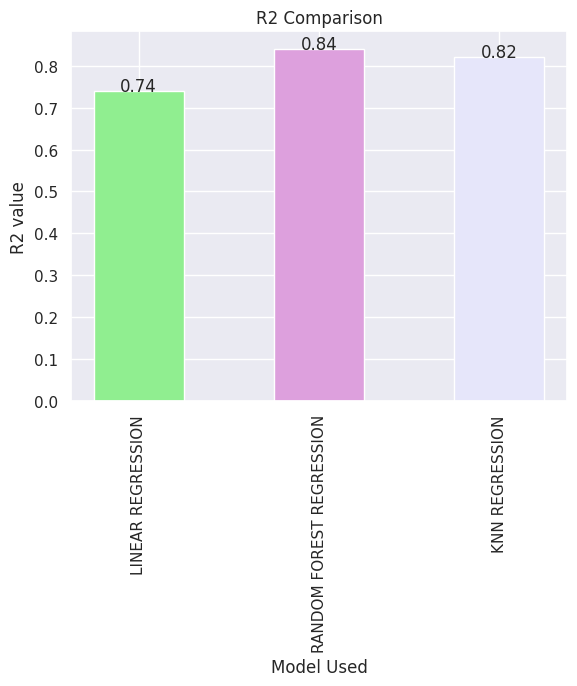

In [ ]:
x_label = ['LINEAR REGRESSION', 'RANDOM FOREST REGRESSION', 'KNN REGRESSION']
y_label = [round(r2_lin,2), round(r2_rf,2), round(r2_knn,2)]
def addlabels(x_label,y_label):
    for i in range(len(x_label)):
        plt.text(i,y_label[i],y_label[i], ha = 'center')
addlabels(x_label,y_label)
plt.bar(x_label,y_label, width=0.5, align='center', color=['lightgreen', 'plum', 'lavender','tomato'])
plt.xlabel('Model Used')
plt.ylabel('R2 value')
plt.title('R2 Comparison')
plt.xticks(rotation = 90)
plt.show()